In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [6]:
X

array([[ 0.20575813, -1.00575762],
       [-3.412689  ,  2.94584412],
       [-0.88292466, -3.12698071],
       ...,
       [ 0.38829265,  1.59921403],
       [ 0.90160285,  1.91983385],
       [-1.46874926, -1.71223251]])

In [7]:
y

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [8]:
pd.DataFrame(X)[0]

0      0.205758
1     -3.412689
2     -0.882925
3      1.373619
4     -1.355828
         ...   
995   -1.439659
996   -0.174311
997    0.388293
998    0.901603
999   -1.468749
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

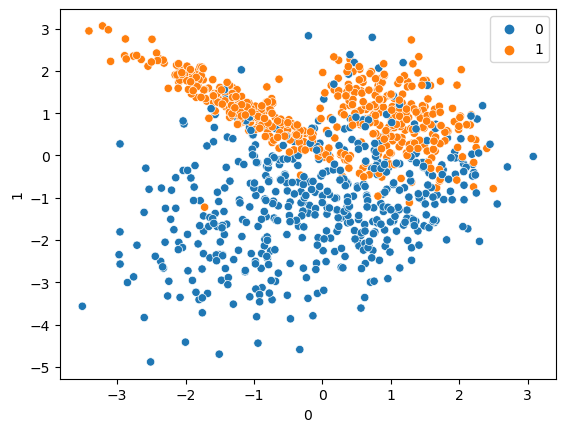

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [13]:
from sklearn.svm import SVC

In [15]:
svc=SVC(kernel='linear')

In [16]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=svc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,classification_report,r2_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.864
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       111
           1       0.93      0.82      0.87       139

    accuracy                           0.86       250
   macro avg       0.86      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250



In [22]:
#kernels

In [27]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [28]:
print(accuracy_score(y_pred,y_test))

0.864


In [29]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.772


In [30]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.864


In [31]:
###Using gridsearch

In [32]:
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['linear','poly','rbf','sigmoid']}

In [37]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=3,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.868 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.848 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.872 total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.864 total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.824 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.704 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.708 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [38]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
y_predict=grid.predict(X_test)
print(accuracy_score(y_predict,y_test))
print(classification_report(y_predict,y_test))

0.848
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       103
           1       0.94      0.79      0.86       147

    accuracy                           0.85       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.87      0.85      0.85       250

